In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

import matplotlib.pyplot as plt

In [54]:
np.random.seed = 10
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

X_HotEncoded_NumOfFeatures = len(list(X_HotEncoded.columns))

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
X_LabelEncoded_NumOfFeatures = len(list(X.columns))
print(X.columns)
print(X.shape)



print(X_HotEncoded.columns)
print(X_HotEncoded.shape)
#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupatio

In [3]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
dfMadelon_X_NumOfFeatures = len(list(dfMadelon_X.columns))
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfMadelon_X_scaled=scaler.fit_transform(dfMadelon_X)

print(dfMadelon_X_scaled.shape)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer()
dfMadelon_X_normalized=normaliser.fit_transform(dfMadelon_X)
print(dfMadelon_X_normalized.shape)
np.random.seed =10

(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)
(2000, 500)
(2000, 500)


In [4]:
def PCA_KMeans(data,i):
        model = PCA(n_components=i)        
        data_new = model.fit_transform(data)
        return data_new

In [5]:
def ICA_KMeans(data,i):
        model = FastICA(n_components=i,max_iter=10000,tol=0.01)        
        data_new = model.fit_transform(data)
        return data_new

In [6]:
def RP_KMeans(data,i):
        model = GaussianRandomProjection(n_components=i)
        data_new = model.fit_transform(data)
        return data_new

In [7]:
def LDA_KMeans(data,groundtruth):
        model = LinearDiscriminantAnalysis(n_components=1)
        data_new = model.fit(data,groundtruth).transform(data)
        return data_new

In [18]:
def PlotElbowMethod(data):
    distortions = []   
    for i in range(1, 10):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            tol=1e-04, random_state=0
        )
        km.fit(data)
        distortions.append(km.inertia_)
        
    # plot
    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [9]:
def PrintSilhouetteScore(data,actual_label):
    silhouette =[]
    homogeneity =[]
    completeness =[]
    for i in range(2, 10):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            tol=1e-04, random_state=0
        )
        
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette.append(silhouette_avg)
        homogeneity_avg = homogeneity_score(actual_label, cluster_labels)
        homogeneity.append(homogeneity_avg)
        completeness_avg = completeness_score(actual_label, cluster_labels)
        completeness.append(completeness_avg)
       
        
    plt.plot(range(2, 10), silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette Score')
    plt.show()
    
    plt.plot(range(2, 10), homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Homogenity Score')
    plt.show()
    
    plt.plot(range(2, 10), completeness, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Completeness Score')
    plt.show()
    

In [10]:
def Plot2MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

In [17]:
def Plot3MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

In [65]:
def Plot5MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    plt.scatter(
        X[y_km == 3, 0], X[y_km == 3, 1],
        s=50, c='pink',
        marker='v', edgecolor='black',
        label='cluster 4'
    )
    plt.scatter(
        X[y_km == 4, 0], X[y_km == 4, 1],
        s=50, c='yellow',
        marker='v', edgecolor='black',
        label='cluster 5'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

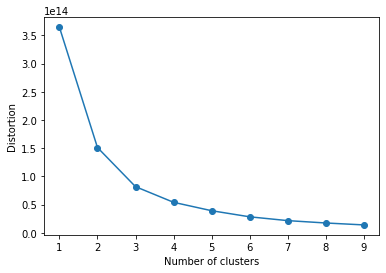

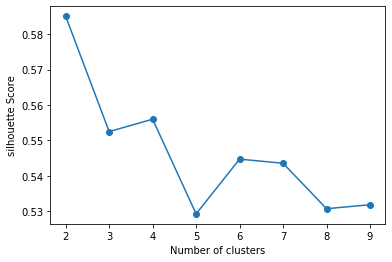

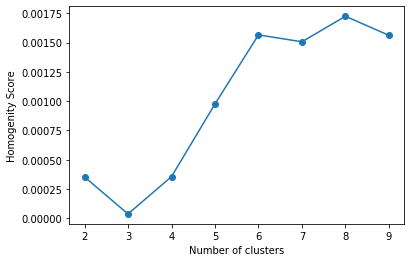

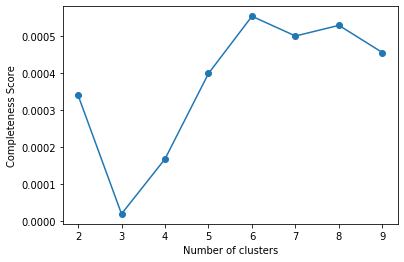

In [10]:
#ADULT PCA_KMEANS
data_new = PCA_KMeans(X_HotEncoded,2)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,Y_HotEncoded)


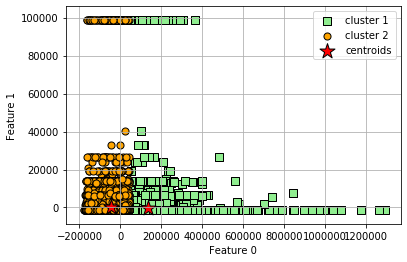

In [22]:
data_new = PCA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

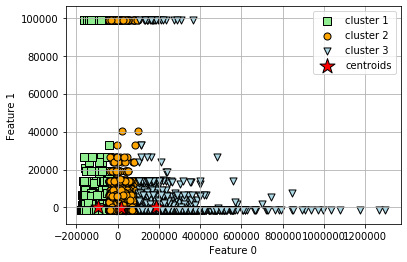

In [37]:
data_new = PCA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

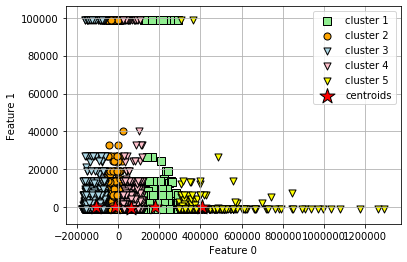

In [66]:
data_new = PCA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

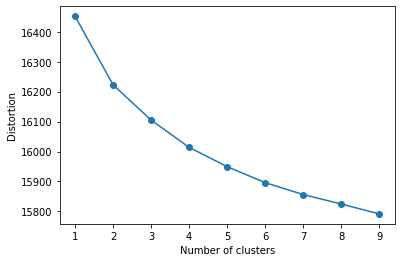

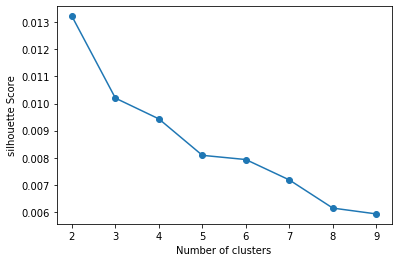

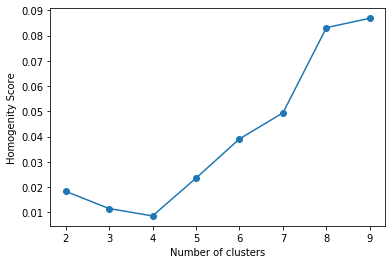

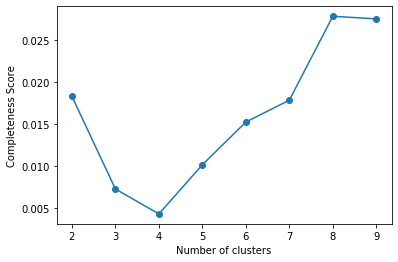

In [11]:
#Madelon PCA_KMEANS
data_new = PCA_KMeans(dfMadelon_X_scaled,300)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,dfMadelon_Y)

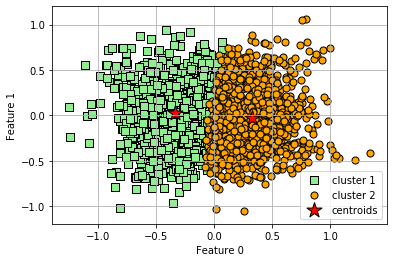

In [39]:
data_new = PCA_KMeans(dfMadelon_X_scaled,300)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

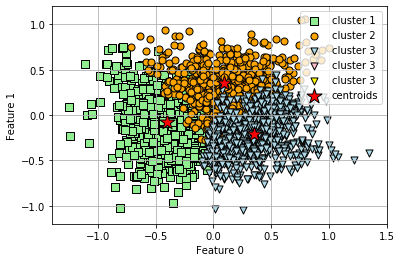

In [40]:
data_new = PCA_KMeans(dfMadelon_X_scaled,300)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

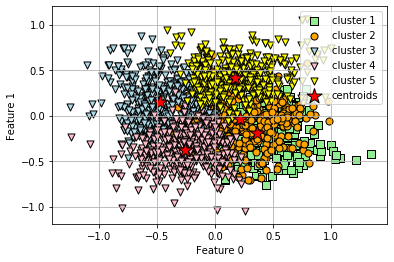

In [67]:
data_new = PCA_KMeans(dfMadelon_X_scaled,300)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

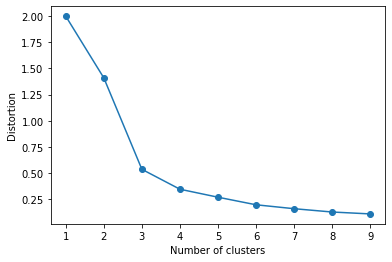

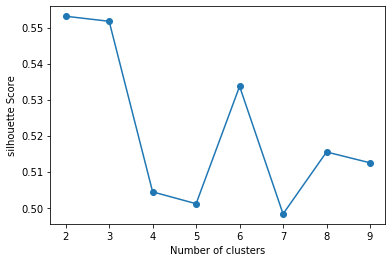

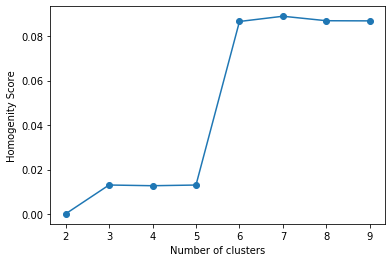

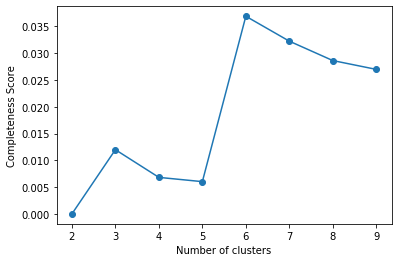

In [12]:
#ADULT ICA_KMEANS
data_new = ICA_KMeans(X_HotEncoded,2)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,Y_HotEncoded)

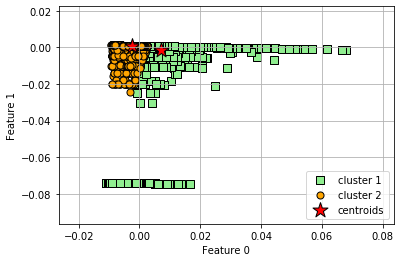

In [31]:
data_new = ICA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

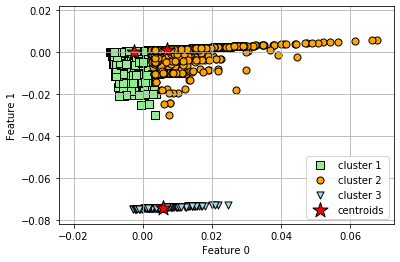

In [42]:
data_new = ICA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

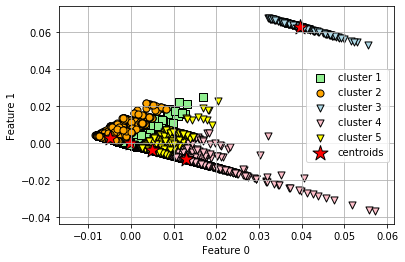

In [68]:
data_new = ICA_KMeans(X_HotEncoded,2)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


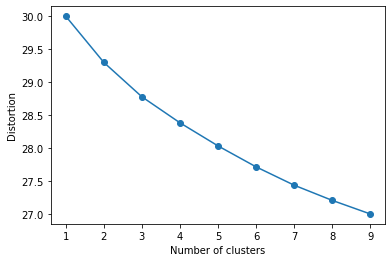

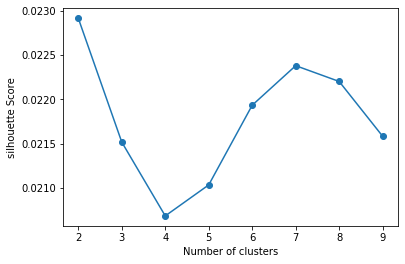

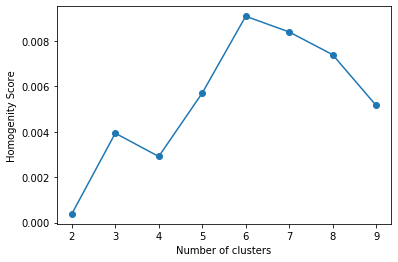

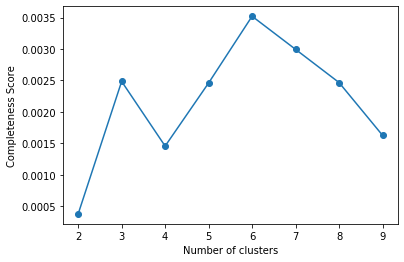

In [13]:
#Madelon ICA_KMEANS
data_new = ICA_KMeans(dfMadelon_X_scaled,30)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,dfMadelon_Y)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


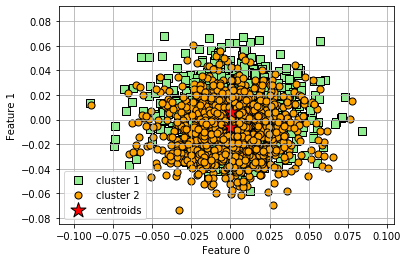

In [70]:
data_new = ICA_KMeans(dfMadelon_X_scaled,30)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


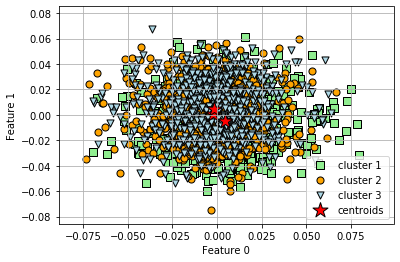

In [46]:
data_new = ICA_KMeans(dfMadelon_X_scaled,30)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


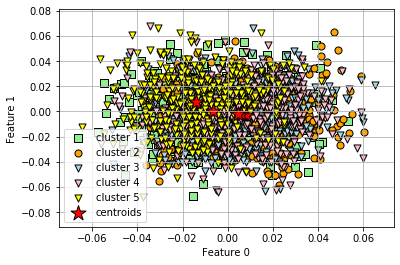

In [74]:
data_new = ICA_KMeans(dfMadelon_X_scaled,30)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

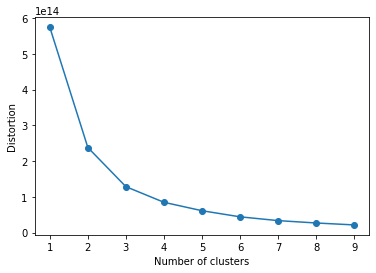

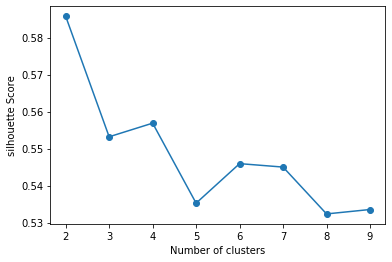

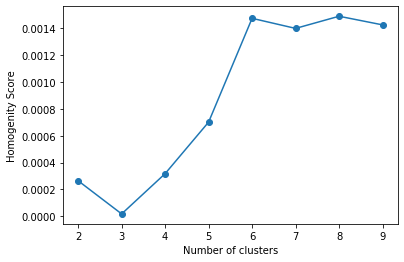

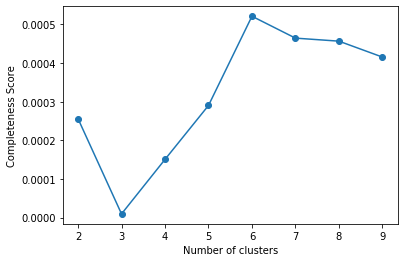

In [14]:
#ADULT RP_KMEANS
data_new = RP_KMeans(X_HotEncoded,3)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,Y_HotEncoded)

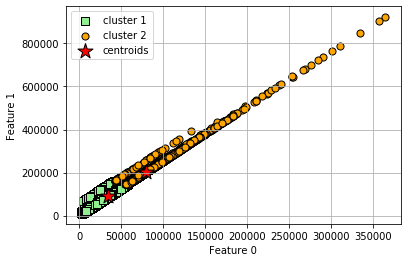

In [55]:
data_new = RP_KMeans(X_HotEncoded,3)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

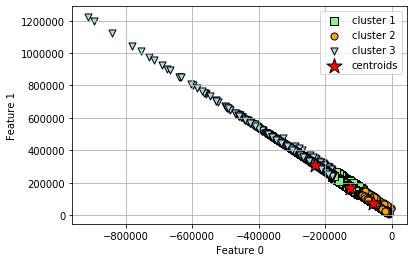

In [58]:
data_new = RP_KMeans(X_HotEncoded,3)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

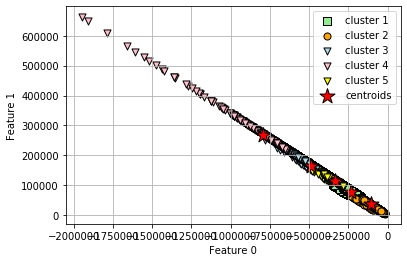

In [72]:
data_new = RP_KMeans(X_HotEncoded,3)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

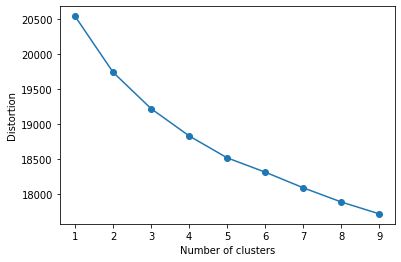

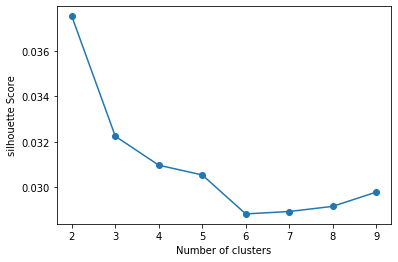

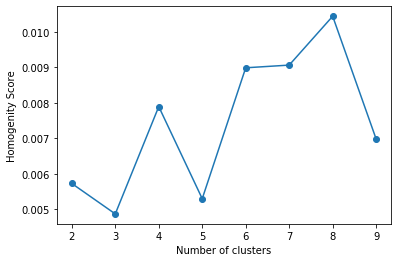

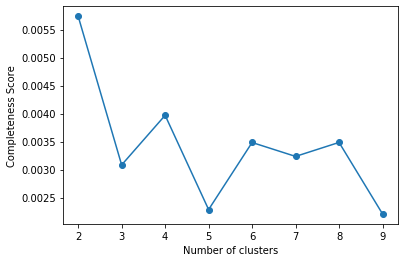

In [15]:
#Madelon RP_KMEANS
data_new = RP_KMeans(dfMadelon_X_scaled,28)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,dfMadelon_Y)

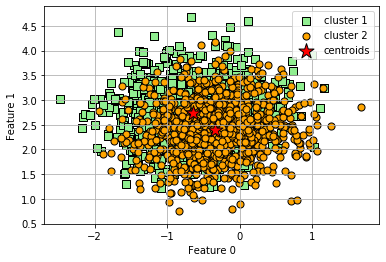

In [61]:
data_new = RP_KMeans(dfMadelon_X_scaled,28)
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

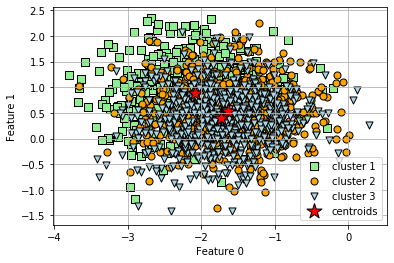

In [62]:
data_new = RP_KMeans(dfMadelon_X_scaled,28)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

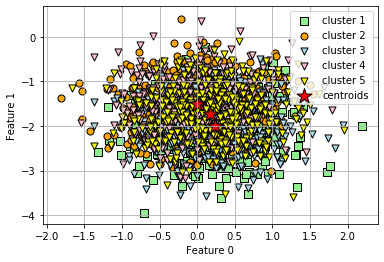

In [73]:
data_new = RP_KMeans(dfMadelon_X_scaled,28)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pd.DataFrame(data_new))
Plot5MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,km)

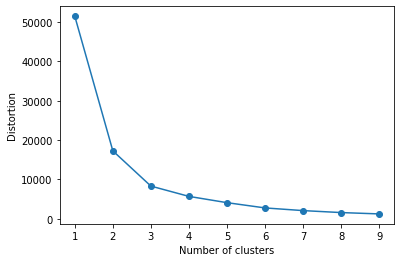

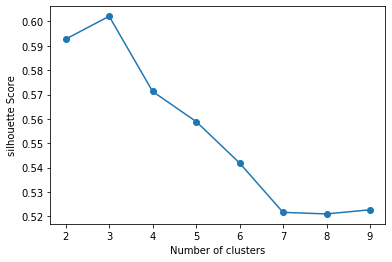

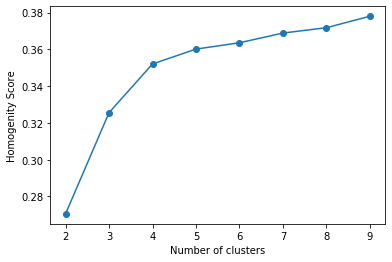

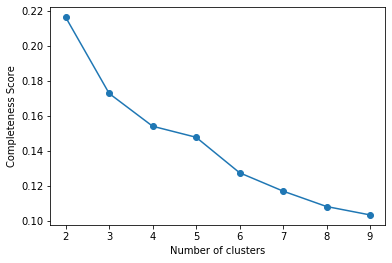

In [16]:
#ADULT LDA_KMEANS
data_new = LDA_KMeans(X_HotEncoded,Y_HotEncoded)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,Y_HotEncoded)

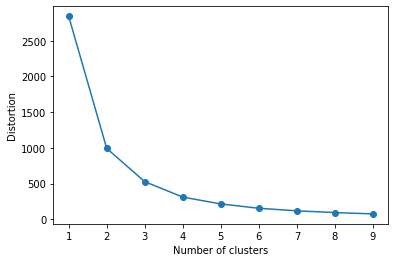

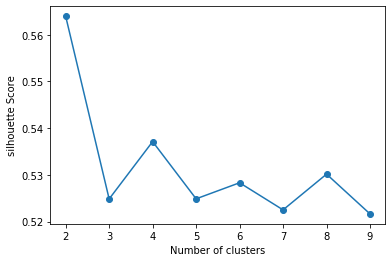

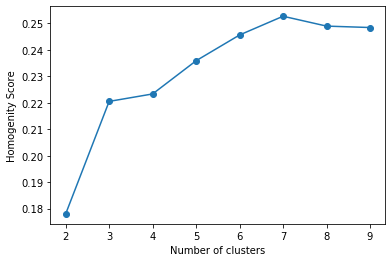

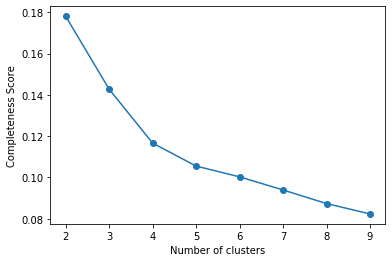

In [17]:
#Madelon LDA_KMEANS
data_new = LDA_KMeans(dfMadelon_X_scaled,dfMadelon_Y)
PlotElbowMethod(data_new)
PrintSilhouetteScore(data_new,dfMadelon_Y)